In [1]:
import numpy as np
import argparse
import cv2
import os,shutil
import time
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from collections import Counter
from itertools import chain
import rawpy
import imageio
from matplotlib import pyplot as plt

In [2]:
import src.util_segment as us
from skimage.measure import compare_ssim

In [3]:
%matplotlib inline

In [4]:
path = '/home/sachin/Jimmy Joseph/Felix-3D/images/_DC/'
temp_results_folder = '/home/sachin/Jimmy Joseph/Felix-3D/out_DC_sample_images/'

In [5]:
files = sorted(os.listdir(path))
files = np.array(files)

In [6]:
files

array(['_DSC0117.JPG', '_DSC0118.JPG', '_DSC0119.JPG', '_DSC0120.JPG',
       '_DSC0121.JPG', '_DSC0122.JPG', '_DSC0123.JPG', '_DSC0124.JPG',
       '_DSC0125.JPG', '_DSC0126.JPG', '_DSC0127.JPG', '_DSC0128.JPG',
       '_DSC0129.JPG', '_DSC0130.JPG', '_DSC0131.JPG', '_DSC0132.JPG',
       '_DSC0133.JPG', '_DSC0134.JPG', '_DSC0135.JPG', '_DSC0136.JPG',
       '_DSC0137.JPG', '_DSC0138.JPG', '_DSC0139.JPG', '_DSC0140.JPG',
       '_DSC0141.JPG', '_DSC0142.JPG', '_DSC0143.JPG', '_DSC0144.JPG',
       '_DSC0145.JPG', '_DSC0146.JPG', '_DSC0147.JPG', '_DSC0148.JPG',
       '_DSC0149.JPG', '_DSC0150.JPG', '_DSC0151.JPG', '_DSC0152.JPG'],
      dtype='<U12')

In [7]:
group_size = 36
m = (int)(len(files)/group_size)
files_group = np.split(files , [i*group_size for i in range(1,m)])

In [8]:
files_group

[array(['_DSC0117.JPG', '_DSC0118.JPG', '_DSC0119.JPG', '_DSC0120.JPG',
        '_DSC0121.JPG', '_DSC0122.JPG', '_DSC0123.JPG', '_DSC0124.JPG',
        '_DSC0125.JPG', '_DSC0126.JPG', '_DSC0127.JPG', '_DSC0128.JPG',
        '_DSC0129.JPG', '_DSC0130.JPG', '_DSC0131.JPG', '_DSC0132.JPG',
        '_DSC0133.JPG', '_DSC0134.JPG', '_DSC0135.JPG', '_DSC0136.JPG',
        '_DSC0137.JPG', '_DSC0138.JPG', '_DSC0139.JPG', '_DSC0140.JPG',
        '_DSC0141.JPG', '_DSC0142.JPG', '_DSC0143.JPG', '_DSC0144.JPG',
        '_DSC0145.JPG', '_DSC0146.JPG', '_DSC0147.JPG', '_DSC0148.JPG',
        '_DSC0149.JPG', '_DSC0150.JPG', '_DSC0151.JPG', '_DSC0152.JPG'],
       dtype='<U12')]

In [9]:
if os.path.isdir(temp_results_folder):
    shutil.rmtree(temp_results_folder, ignore_errors=False, onerror=None)
os.mkdir(temp_results_folder)
images  = []

roi_mask = cv2.imread('/home/sachin/Jimmy Joseph/Felix-3D/_DC_roi_masks/1_roi_mask_out.png',0)
roi_mask[roi_mask>0] = 1

i = 1
print('Processing '+str(m)+' groups')
start_time = time.time()
for f in files_group[0]:

    original_image = None
    original_image = cv2.imread(os.path.join(path,f))
    (he,wi) = original_image.shape[:2]
    original_image = original_image[100:he-100,100:wi-100]
    #image_with_object = original_image*roi_mask[:,:,np.newaxis]
    images.append(original_image)
    i+=1

print("Completed reading all groups in  %s seconds " % (time.time() - start_time))

Processing 1 groups
Completed reading all groups in  11.606809377670288 seconds 


In [115]:
for image in images:

    im_c = cv2.cvtColor(image,cv2.COLOR_BGR2LAB)
    im_c = im_c[:,:,0]
    
    im_c = cv2.medianBlur(im_c,3)
    th = cv2.adaptiveThreshold(im_c,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
        cv2.THRESH_BINARY,3,2)
    
    #blur = cv2.GaussianBlur(im_c,(3,3),0)

    sobelx = cv2.Sobel(th,cv2.CV_64F,1,0,ksize=3)
    sobely = cv2.Sobel(th,cv2.CV_64F,0,1,ksize=3)
    break

In [116]:
sobel = None

In [117]:
sobel = cv2.add(sobelx,sobely)

In [122]:
us.displayImage(sobel)

In [123]:
us.displayImage(th)

# Testing graph based algorithms

In [10]:
us.displayImage(images[0])

In [25]:
 from skimage.segmentation import slic

In [11]:
from skimage.segmentation import felzenszwalb
from skimage.data import coffee
img =  images[0].copy()
ratio = 0.3
dim = (int(img.shape[1]*ratio),int(img.shape[0]*ratio))
image = cv2.resize(img,dim ,interpolation = cv2.INTER_AREA)

In [39]:
segments = felzenszwalb(image, scale=30, sigma=0.95, min_size=5)

In [36]:
segments_slic = slic(images[0], n_segments=500, compactness=50)

In [40]:
from skimage.color import label2rgb
image_label_overlay = label2rgb(segments, image=image)

In [41]:
us.displayImage(image_label_overlay)

In [20]:
from skimage.segmentation import mark_boundaries
us.displayImage(mark_boundaries(image,segments))

In [38]:
image_label_overlay_slic = label2rgb(segments_slic, image=images[0])
us.displayImage(image_label_overlay_slic)

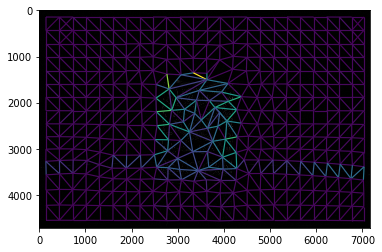

In [12]:
from skimage.future import graph
from skimage import data, segmentation, color, filters, io
from matplotlib import pyplot as plt


#img = data.coffee()
#img = images[0]
gimg = color.rgb2gray(img)

labels = segmentation.slic(img, compactness=30, n_segments=400)
edges = filters.sobel(gimg)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(labels, edges)
lc = graph.show_rag(labels, g, edges_rgb, img_cmap=None, edge_cmap='viridis',
                    edge_width=1.2)



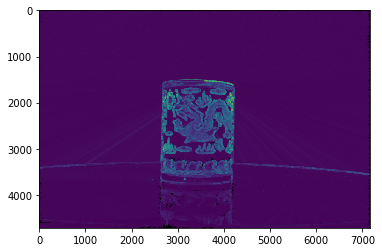

In [13]:
from skimage.future import graph
from skimage import data, segmentation, color, filters, io
from matplotlib import pyplot as plt


#img = data.coffee()
#img = images[0]
gimg = color.rgb2gray(img)

labels = segmentation.felzenszwalb(img, scale=30, sigma=0.95, min_size=5)
edges = filters.sobel(gimg)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(labels, edges)
lc = graph.show_rag(labels, g, edges_rgb, img_cmap=None, edge_cmap='viridis',
                    edge_width=1.2)

In [20]:
us.displayImage(edges.astype('uint8'))

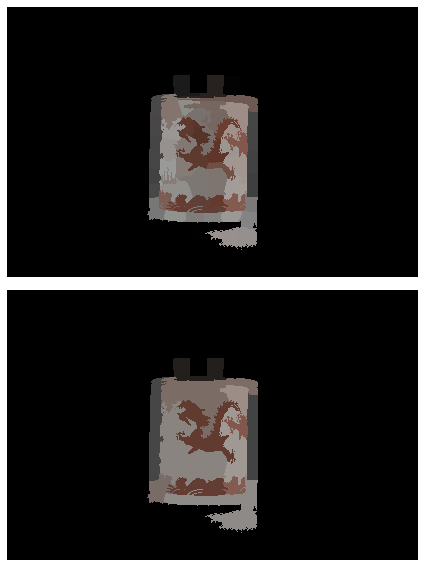

In [26]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt


img = images[0]

labels1 = segmentation.slic(img, compactness=30, n_segments=400)
out1 = color.label2rgb(labels1, img, kind='avg')

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg')

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

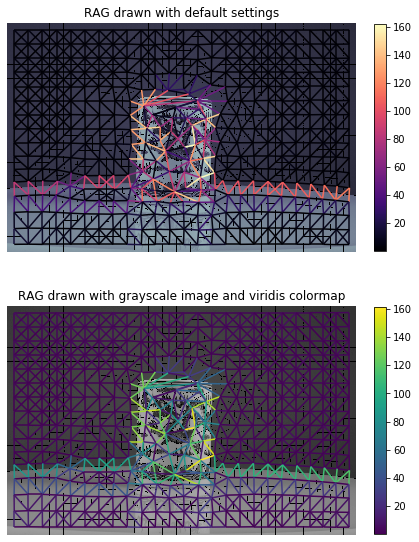

In [43]:
from skimage import data, segmentation
from skimage.future import graph
from matplotlib import pyplot as plt


img = image
labels = segmentation.slic(img, compactness=30, n_segments=400)
g = graph.rag_mean_color(img, labels)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].set_title('RAG drawn with default settings')
lc = graph.show_rag(labels, g, img, ax=ax[0])
# specify the fraction of the plot area that will be used to draw the colorbar
fig.colorbar(lc, fraction=0.03, ax=ax[0])

ax[1].set_title('RAG drawn with grayscale image and viridis colormap')
lc = graph.show_rag(labels, g, img,
                    img_cmap='gray', edge_cmap='viridis', ax=ax[1])
fig.colorbar(lc, fraction=0.03, ax=ax[1])

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [45]:
def resize(im):
    img =  im.copy()
    ratio = 0.3
    dim = (int(img.shape[1]*ratio),int(img.shape[0]*ratio))
    image = cv2.resize(img,dim ,interpolation = cv2.INTER_AREA)
    return image

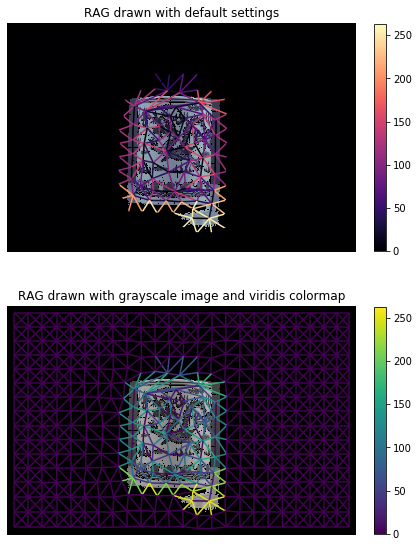

In [46]:
from skimage import data, segmentation
from skimage.future import graph
from matplotlib import pyplot as plt


img = image

roi = resize(roi_mask)
img = img*roi[:,:,np.newaxis]
labels = segmentation.slic(img, compactness=30, n_segments=400)
g = graph.rag_mean_color(img, labels)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].set_title('RAG drawn with default settings')
lc = graph.show_rag(labels, g, img, ax=ax[0])
# specify the fraction of the plot area that will be used to draw the colorbar
fig.colorbar(lc, fraction=0.03, ax=ax[0])

ax[1].set_title('RAG drawn with grayscale image and viridis colormap')
lc = graph.show_rag(labels, g, img,
                    img_cmap='gray', edge_cmap='viridis', ax=ax[1])
fig.colorbar(lc, fraction=0.03, ax=ax[1])

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

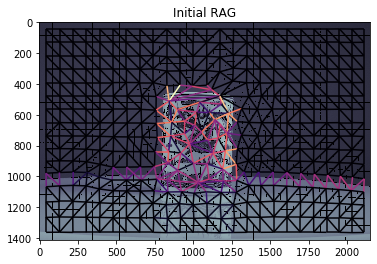

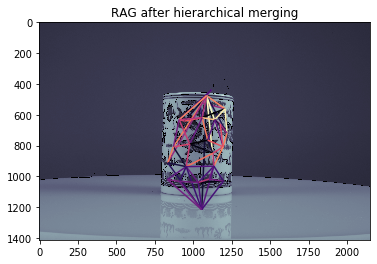

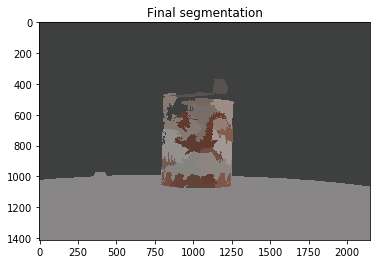

In [49]:
from skimage import data, segmentation, filters, color
from skimage.future import graph
from matplotlib import pyplot as plt


def weight_boundary(graph, src, dst, n):
    """
    Handle merging of nodes of a region boundary region adjacency graph.

    This function computes the `"weight"` and the count `"count"`
    attributes of the edge between `n` and the node formed after
    merging `src` and `dst`.


    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the "weight" and "count" attributes to be
        assigned for the merged node.

    """
    default = {'weight': 0.0, 'count': 0}

    count_src = graph[src].get(n, default)['count']
    count_dst = graph[dst].get(n, default)['count']

    weight_src = graph[src].get(n, default)['weight']
    weight_dst = graph[dst].get(n, default)['weight']

    count = count_src + count_dst
    return {
        'count': count,
        'weight': (count_src * weight_src + count_dst * weight_dst)/count
    }


def merge_boundary(graph, src, dst):
    """Call back called before merging 2 nodes.

    In this case we don't need to do any computation here.
    """
    pass

img = image
edges = filters.sobel(color.rgb2gray(img))
labels = segmentation.slic(img, compactness=30, n_segments=400)
g = graph.rag_boundary(labels, edges)

graph.show_rag(labels, g, img)
plt.title('Initial RAG')

labels2 = graph.merge_hierarchical(labels, g, thresh=0.05, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_boundary,
                                   weight_func=weight_boundary)

graph.show_rag(labels, g, img)
plt.title('RAG after hierarchical merging')

plt.figure()
out = color.label2rgb(labels2, img, kind='avg')
plt.imshow(out)
plt.title('Final segmentation')

plt.show()
